# V-H (AC measurements) for different $\theta$
# $H_{sw} - \theta$ 


In [1]:
# load Packages & Settings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import os
%matplotlib inline
# set fonts
font = {'family' : 'Sans',
        'weight' : 'bold',
        'size'   : 8}
rc('font', **font)

## Implement the Edge and location finder function

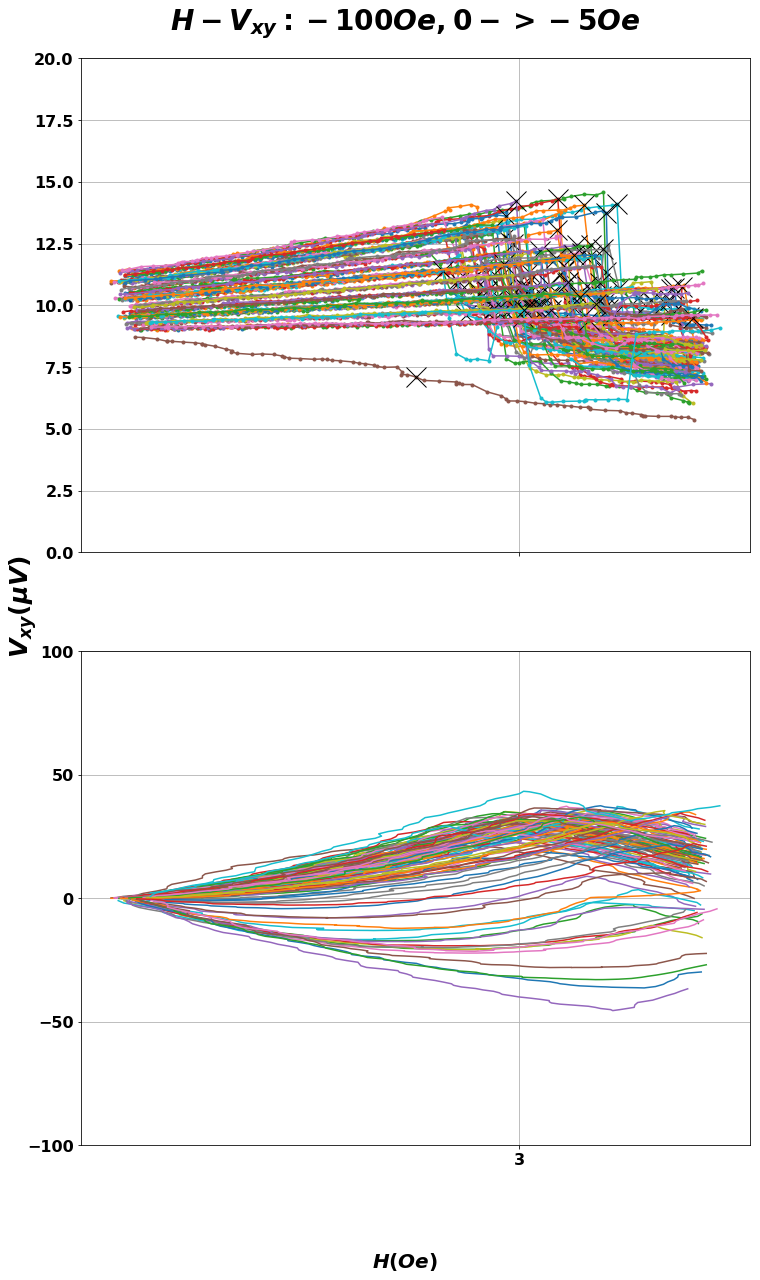

In [5]:
# # V-H (AC measurements) for different $\theta$
# # $H_{sw} - \theta$ 

# load Packages & Settings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import os
# set fonts
font = {'family' : 'Sans',
        'weight' : 'bold',
        'size'   : 8}
rc('font', **font)

# get files from rootdir with specific suffix
def get_files(rootdir, suffix):
    file_list = []
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file.endswith(suffix):
                file_list.append(os.path.join(subdir, file))
#     file_list.sort(key=lambda x: x) # sort file by name


    file_list.sort(key=lambda x: float(x.split('Index_')[1].split('Degree')[0]))
#     file_list.sort(key=lambda x: os.path.getmtime(x)) # sort file by time
    return file_list

# load data from file and return it as numpy-array
def load_data(filename):
    arr = []
    for line in [line for line in open(filename, 'r')]:
        temp = [float(element) for element in line.split(',')] # parse each line and convert to floating
        temp =  np.array(temp[10:]) # dump the first M points
        temp.reshape(-1,1) # shape into columns
        arr.append(temp)
    del temp
    return np.array(arr)

# Normalize 1D data set to the range of [lo, hi]
def Normalize1D(x, lo, hi):
    # this works only for 1D data x
    return (hi - lo)*((x - min(x))/(max(x) - min(x)))-(hi - lo)/2.0

def search_jump(x, Angle):
    if(Angle <= 90):
        # find max for downward jump
        return np.argmin(x)
    elif(Angle > 90):
        # find min for upward jump
        return np.argmax(x)


# traverse to the target directory, load filenames and sort them by time.
rootdir = "/Users/yiyi/Downloads/Hsw-Angle/1025To1026-RH_Angle"
os.chdir(rootdir)

file_list = get_files(rootdir, '.txt')
# plot out V-H for different Angles
Angle_Hsw = []
i = 0
fig = plt.figure(figsize=(10, 16), dpi=300)
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey = False, figsize=(12, 20))
ax1.grid(True)
ax2.grid(True)
XTicks = np.linspace(0, 5, 6)
YTicks_1 = np.linspace(0, 20, 5)
YTicks_2 = np.linspace(-100, 100, 5)
# startIndex = 0
# endIndex = 

startIndex = -175 #(Angle > 130 and Angle < 170)
endIndex = -100
for file in file_list:
    Angle_str = file.split('Index_')[1].split('Degree')[0]
    Angle = round(float(Angle_str), 3) # get Angle in degree from filename
    data = load_data(file)
    data = data[:, startIndex:endIndex]
    cumV = np.cumsum((Normalize1D(data[1, :], -1, 1)))
    
    if(Angle > 130 and Angle < 170):
#     if(Angle > 0 and Angle < 60):
        index_jump = search_jump(cumV, Angle)
#         if ()
#         width =20
#         index_jump = search_jump(cumV[index_jump-width:index_jump+width], Angle) + index_jump - width
        Hsw = -data[0, index_jump]
        ax1.plot(-data[0, :], data[1, :], marker='.', label=Angle_str) # reverse the axis to positive
#         ax1.plot(Hsw, data[1, index_jump], 'k+', markersize=20)
#         ax1.set_xlim([2.5, 3.5])
        ax1.set_ylim([0, 20])
        ax1.set_xticks(XTicks)
        ax1.tick_params(labelsize=16)
        ax2.plot(-data[0, :], cumV, label=Angle_str)
#         ax2.set_xlim([2, 3.5])
        ax2.set_yticks(YTicks_1)
        ax2.set_yticks(YTicks_2)
        ax2.tick_params(labelsize=16)
        if((Hsw != -data[0, -1:]) and (Hsw != -data[0, 0])):
            Angle_Hsw.append([Angle, Hsw])
            ax1.plot(Hsw, data[1, index_jump], 'kx', markersize=20)
    i = i + 1
f.text(0.5, 0.9, '$H-V_{xy}: -100 Oe, 0->-5Oe$', ha='center', fontsize=28)
f.text(0.5, 0.04, '$H(Oe)$', ha='center', fontsize=20)
f.text(0.04, 0.5, '$V_{xy} (\mu V)$', va='center', rotation='vertical', fontsize=25)
f.savefig('Hsw-Angle-90to180-1025To1026.png')
np.savetxt('Angle_Hsw-90to180-1025To1026.csv', Angle_Hsw, delimiter=",")

# f.savefig('Hsw-Angle-90to180_Round-' + rootdir.split('Round- ')[1] + '.png')
# np.savetxt('Hsw-Angle-90to180_Round-' + rootdir.split('Round- ')[1] + '.csv', Angle_Hsw, delimiter=",")
# ax1.legend(loc='upper left', fontsize=10)
plt.show()
plt.close("all")

Text(0.5,1,'$H_sw - Angle$')

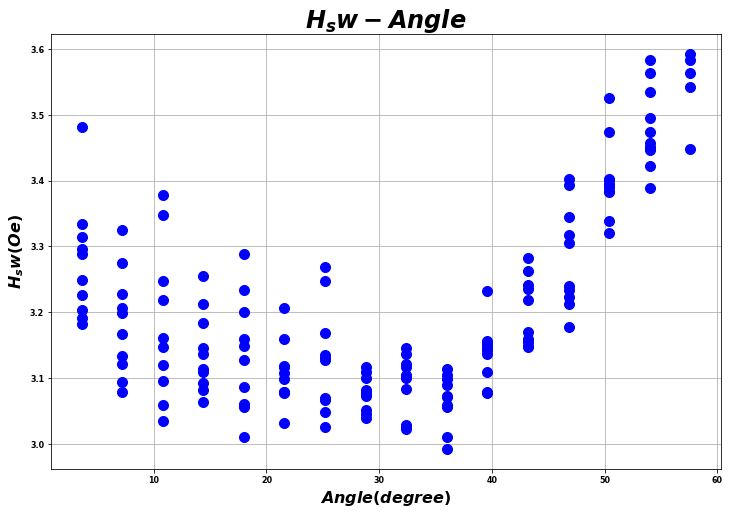

In [8]:
fig = plt.figure(figsize=(12, 8))
Angle_Hsw=np.array(Angle_Hsw)
Angle_Hsw_df = pd.DataFrame()
plt.plot(Angle_Hsw[:, 0], Angle_Hsw[:, 1], 'bo', markersize=10)
# plt.xlim([0, 60])
# plt.ylim([3, 4.5])
plt.grid(True)
# plt.xticks(np.linspace(0, 60, 7), fontsize=16)
# plt.yticks(np.linspace(3.0, 4.5, 4), fontsize=16)
plt.xlabel('$Angle(degree)$', fontsize=16)
plt.ylabel('$H_sw(Oe)$', fontsize=16)
plt.title('$H_sw - Angle$', fontsize=24)

In [21]:
# traverse to the target directory, load filenames and sort them by time.
rootdir = "/Users/yiyi/Downloads/Hsw-Angle/1027To1028-RH_Angle"
os.chdir(rootdir)

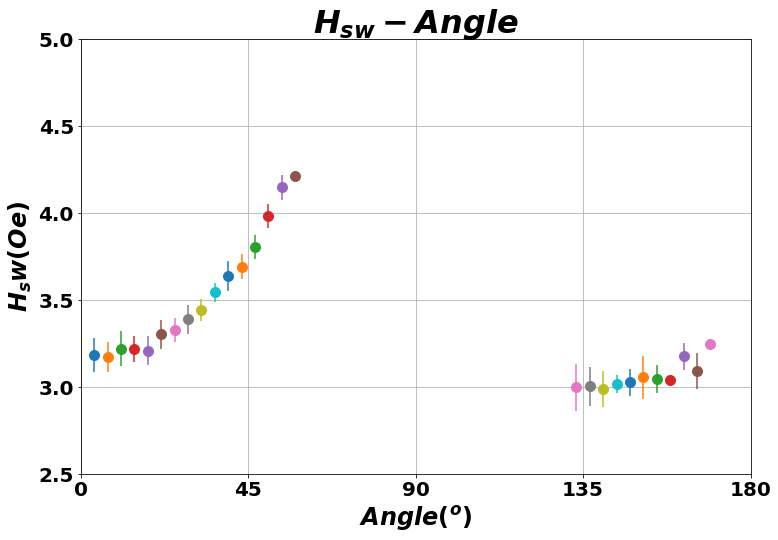

In [16]:
Angle_Hsw_0to90 = pd.read_csv('Angle_Hsw-0to90-1025To1026.csv')
Angle_Hsw_90to180 = pd.read_csv('Angle_Hsw-90to180-1025To1026.csv')
arr = np.vstack((Angle_Hsw_0to90, Angle_Hsw_90to180))
df = pd.DataFrame(arr)
df.columns=['Angle', 'Hsw']
fig = plt.figure(figsize=(12, 8))
XTicks = np.linspace(0, 180, 5)
YTicks = np.linspace(2.5, 5.0, 6)
for angle in df['Angle'].unique():
#     print(angle)
    angle_mask = (df['Angle'] == angle)
    temp_data = df[angle_mask]
#     print(temp_data)
    Hsw_temp = (temp_data['Hsw']).mean()
    Hsw_lo = (temp_data['Hsw']).min()
    Hsw_hi = (temp_data['Hsw']).max()
    plt.errorbar(angle, Hsw_temp, (Hsw_hi - Hsw_lo)/2, markersize=10, fmt='o')
plt.title('$H_{sw}-Angle$', fontsize = 32)
plt.xlabel('$Angle(^o)$', fontsize=24)
plt.ylabel('$H_sw(Oe)$', fontsize=24)
plt.xticks(XTicks, fontsize=16)
plt.yticks(YTicks, fontsize=16)
plt.grid(True)
plt.ylim([2.5, 5])
plt.xlim([0, 180])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

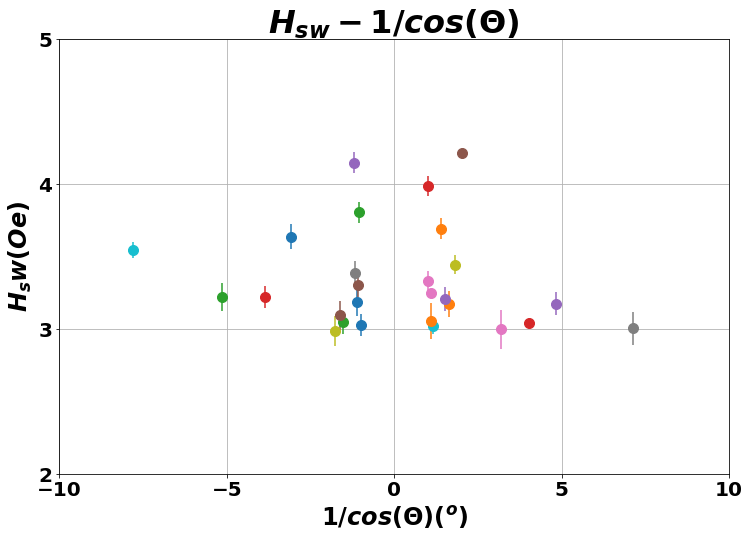

In [29]:
# traverse to the target directory, load filenames and sort them by time.
rootdir = "/Users/yiyi/Downloads/Hsw-Angle/1025To1026-RH_Angle"
os.chdir(rootdir)
Angle_Hsw_0to90 = pd.read_csv('Angle_Hsw-0to90-1025To1026.csv')
Angle_Hsw_90to180 = pd.read_csv('Angle_Hsw-90to180-1025To1026.csv')
arr = np.vstack((Angle_Hsw_0to90, Angle_Hsw_90to180))
df = pd.DataFrame(arr)
df.columns=['Angle', 'Hsw']
fig = plt.figure(figsize=(12, 8))
XTicks = np.linspace(-10, 10, 5)
YTicks = np.linspace(2.0, 5.0, 4)
for angle in df['Angle'].unique():
#     print(angle)
    angle_mask = (df['Angle'] == angle)
    temp_data = df[angle_mask]
#     print(temp_data)
    Hsw_temp = (temp_data['Hsw']).mean()
    Hsw_lo = (temp_data['Hsw']).min()
    Hsw_hi = (temp_data['Hsw']).max()
    plt.errorbar(1/np.cos(angle), Hsw_temp, (Hsw_hi - Hsw_lo)/2, markersize=10, fmt='o')
plt.title('$H_{sw}-1/cos(\Theta)$', fontsize = 32)
plt.xlabel('$1/cos(\Theta)(^o)$', fontsize=24)
plt.ylabel('$H_sw(Oe)$', fontsize=24)
plt.xticks(XTicks, fontsize=16)
plt.yticks(YTicks, fontsize=16)
plt.grid(True)
plt.ylim([2.0, 5])
plt.xlim([-10, 10])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [1]:
# traverse to the target directory, load filenames and sort them by time.

def Kondorsky(angle):
    return 1/np.cos(angle)

def SW(anlge):
    return 1/(np.cos(angle)**(2/3) + np.cos(angle)**(2/3))**(2/3)

rootdir = "/Users/yiyi/Downloads/Hsw-Angle/1025To1026-RH_Angle"
os.chdir(rootdir)
Angle_Hsw_0to90 = pd.read_csv('Angle_Hsw-0to90-1025To1026.csv')
Angle_Hsw_90to180 = pd.read_csv('Angle_Hsw-90to180-1025To1026.csv')
arr = np.vstack((Angle_Hsw_0to90, Angle_Hsw_90to180))
df = pd.DataFrame(arr)
df.columns=['Angle', 'Hsw']
fig = plt.figure(figsize=(12, 8))
XTicks = np.linspace(-10, 10, 5)
YTicks = np.linspace(2.0, 5.0, 4)
for angle in df['Angle'].unique():
#     print(angle)
    angle_mask = (df['Angle'] == angle)
    temp_data = df[angle_mask]
#     print(temp_data)
    Hsw_temp = (temp_data['Hsw']).mean()
    Hsw_lo = (temp_data['Hsw']).min()
    Hsw_hi = (temp_data['Hsw']).max()
    plt.errorbar(1/np.cos(angle), Hsw_temp, (Hsw_hi - Hsw_lo)/2, markersize=10, fmt='o')
plt.title('$H_{sw}-1/cos(\Theta)$', fontsize = 32)
plt.xlabel('$1/cos(\Theta)(^o)$', fontsize=24)
plt.ylabel('$H_sw(Oe)$', fontsize=24)
plt.xticks(XTicks, fontsize=16)
plt.yticks(YTicks, fontsize=16)
plt.grid(True)
plt.ylim([2.0, 5])
plt.xlim([-10, 10])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

IndentationError: expected an indented block (<ipython-input-1-a007abd80a9b>, line 7)